# Web Scraping Analysis: an overview of helpful steam reviews for grand strategy titles in the past 6 months



Import the appropraite python libraries


In [7]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')


In [8]:
#Ensure you are working in the appropriate directory

os.getcwd()

os.chdir('insert working directory here')

import the datasets from the csv files unto a data frame and rename them to their game titles from the steam app info 

game ID 42960 is [Victoria 2](https://steamdb.info/app/42960/)

game ID 203770 is [Crusader Kings2](https://steamdb.info/app/203770/)

game ID 394360 is [Hearts of Iron IV](https://steamdb.info/app/394360/)

game ID 281990 is [Stellaris](https://steamdb.info/app/281990/)

In [9]:
victoria2 = pd.read_csv('reviews_42960.csv', index_col=[0])

crusader_kings2 = pd.read_csv('reviews_203770.csv', index_col=[0])

hearts_of_iron4 = pd.read_csv('reviews_394360.csv', index_col=[0])

stellaris = pd.read_csv('reviews_281990.csv', index_col=[0])

In [10]:
#reformat the hours played to a float format 

victoria2['PlayHours'] = victoria2.PlayHours.str.extract(r'(\d+)', expand=True).astype(float)

crusader_kings2['PlayHours'] = crusader_kings2.PlayHours.str.extract(r'(\d+)', expand=True).astype(float)

hearts_of_iron4['PlayHours'] = hearts_of_iron4.PlayHours.str.extract(r'(\d+)', expand=True).astype(float)

stellaris['PlayHours'] = stellaris.PlayHours.str.extract(r'(\d+)', expand=True).astype(float)


let us assess the number of negative and positive reviews of each title 

In [11]:
#victoria2 - negative reviews
len(victoria2.loc[victoria2.Review=='Not Recommended'])

71

In [12]:
#victoria2 - positive reviews
len(victoria2.loc[victoria2.Review=='Recommended'])

1155

([<matplotlib.patches.Wedge at 0x22c92718198>,
 [Text(1.0806032381784727, 0.20566147339304713, 'Not Recommended'),
  Text(-1.0806032550269589, -0.20566138486634147, 'Recommended')],
 [Text(0.5894199480973487, 0.11217898548711662, '6.0%'),
  Text(-0.589419957287432, -0.11217893719982262, '94.0%')])

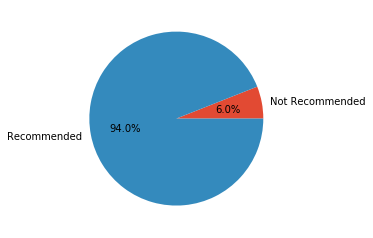

In [13]:
reviews = [71,1115]
recommendation = ['Not Recommended','Recommended']
plt.pie(reviews, labels = recommendation, autopct='%2.1f%%')

In [14]:
#crusader kings 2 - negative reviews
len(crusader_kings2.loc[crusader_kings2.Review=='Not Recommended'])

226

In [15]:
#crusader kings 2 - positive reviews 
len(crusader_kings2.loc[crusader_kings2.Review=='Recommended'])

1473

([<matplotlib.patches.Wedge at 0x22c928781d0>,
 [Text(1.0053407487379324, 0.4464190620113054, 'Not Recommended'),
  Text(-1.005340790534697, -0.4464189678845094, 'Recommended')],
 [Text(0.5483676811297812, 0.24350130655162108, '13.3%'),
  Text(-0.5483677039280165, -0.24350125520973237, '86.7%')])

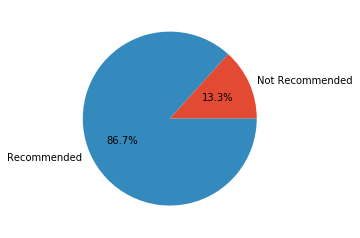

In [16]:
reviews = [226,1473]
recommendation = ['Not Recommended','Recommended']
plt.pie(reviews, labels = recommendation, autopct='%2.1f%%')

In [17]:
#hearts of iron IV - negative reviews
len(hearts_of_iron4.loc[hearts_of_iron4.Review=='Not Recommended'])

895

In [18]:
#hearts of iron IV - positive reviews
len(hearts_of_iron4.loc[hearts_of_iron4.Review=='Recommended'])

10290

([<matplotlib.patches.Wedge at 0x22c9275a2b0>,
 [Text(1.065426109639201, 0.27361872176274293, 'Not Recommended'),
  Text(-1.0654260968301832, -0.2736187716389381, 'Recommended')],
 [Text(0.581141514348655, 0.14924657550695067, '8.0%'),
  Text(-0.581141507361918, -0.14924660271214804, '92.0%')])

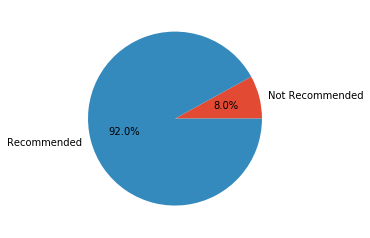

In [19]:
reviews = [895,10290]
recommendation = ['Not Recommended','Recommended']
plt.pie(reviews, labels = recommendation, autopct='%2.1f%%')

In [20]:
#stellaris - negative reviews 
len(stellaris.loc[stellaris.Review=='Not Recommended'])

741

In [21]:
#stellaris - positive reviews
len(stellaris.loc[stellaris.Review=='Recommended'])

6292

([<matplotlib.patches.Wedge at 0x22c927d42e8>,
 [Text(1.0402897578779755, 0.3574873699226078, 'Not Recommended'),
  Text(-1.040289766245571, -0.35748734557286865, 'Recommended')],
 [Text(0.5674307770243502, 0.19499311086687696, '10.5%'),
  Text(-0.5674307815884931, -0.1949930975852011, '89.5%')])

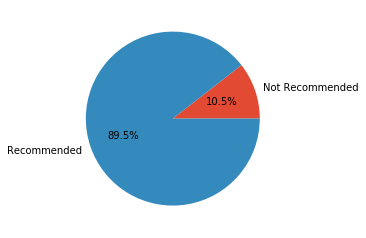

In [22]:
reviews = [741,6292]
recommendation = ['Not Recommended','Recommended']
plt.pie(reviews, labels = recommendation, autopct='%2.1f%%')

In [23]:
data = {'Title':['Victoria2', 'Crusader Kings 2', 'Hearts of Iron IV', 'Stellaris'], 'Negative reviews':[71,226,895,741], 
        'Positive Reviews': [1155,1473,10290,6292]}
df = pd.DataFrame(data)  
df

,Title,Negative reviews,Positive Reviews
0,Victoria2,71,1155
1,Crusader Kings 2,226,1473
2,Hearts of Iron IV,895,10290
3,Stellaris,741,6292


In [24]:
sum_column = df["Negative reviews"] + df["Positive Reviews"]
df["Total Reviews"] = sum_column
df

,Title,Negative reviews,Positive Reviews,Total Reviews
0,Victoria2,71,1155,1226
1,Crusader Kings 2,226,1473,1699
2,Hearts of Iron IV,895,10290,11185
3,Stellaris,741,6292,7033


**Points to consider so far**

- Hearts of Iron IV has the most reviews which does coincide with the fact that it is currently Paradox Games' most popular title according to steam charts in terms of [playercount](https://steamcharts.com/app/394360)

- Victoria 2 has the highest percentage of positive reviews which affirms the community's attitudes twoards it in being a timely classic considering it was released in 2010 and has aged well.   

- Crusader Kings 2 has the highest percentage of users who do not recommend the game which will require a further examiniation of the review descriptions to find out more.

- Overall, over 85% of reviews recommend these games which does explain how grand strategy is an emerging gaming genre.



*Exploring Crusader Kings 2, the least favored game out of the sample* 

As noted, Crusader Kings 2  has the greatest proportion of negative reviews. This is possible due to several reasons. The most important of which is its price tag. Paradox games are notorious for hosting numerous DLCs, some of which are essential to maximize the player's expierence. However, crusader kings 2 does take the cake considering that it is an old game released in 2012 yet alongside the price of the base game, all 51 DLC packs [cost over 300 US dollars](https://www.pcgamesn.com/crusader-kings-ii/subscription-dlc). As one can imagine, this practice is not favored by the gaming community at all.

In addition, it does suffer from an unfriendly user interface, steep learning curve, and simplified mechanics with regards to war.

Nonetheless, people can argue that the user interface serves its purpose and that although its not the greatest, its not the worst. Its steep learning curve is offset by its depth which warrants such a thing and in effect, gives great amounts of replayability and flavor. With regards to its simple war mechanics, players argue that its not a game about war and hence its simple since the game revolves around dynasty management, intrigue, administration, and role playing. 

regardless, let us explore the first reason warranting such dissatisfaction that can be demonstrated by snatching a few samples from the 5 most recent negative reviews 



In [25]:
crusader_kings2.loc[crusader_kings2.Review=='Not Recommended'].head()

,SteamId,ProfileURL,ReviewText,Review,ReviewLength,PlayHours,DatePosted
5,kentarion,https://steamcommunity.com/id/kentarion/,"Its a really good game, like nearly all of the...",Not Recommended,798.0,12.0,Posted: 13 May
9,cykahehe,https://steamcommunity.com/id/cykahehe/,I truly like this game but no game should have...,Not Recommended,487.0,750.0,Posted: 17 July
13,Resoula,https://steamcommunity.com/id/Resoula/,The beginning of Paradox's descent into DLC hell.,Not Recommended,42.0,79.0,Posted: 16 March
15,thepersonyouhate,https://steamcommunity.com/id/thepersonyouhate/,"This game is amazing. It's fun, interesting, e...",Not Recommended,1219.0,569.0,Posted: 8 March
26,DeerTrap,https://steamcommunity.com/id/DeerTrap/,Capitalism: A comparison of videogame subscrip...,Not Recommended,1605.0,78.0,Posted: 20 February


let us examine some reviews from a few users above in detail to get an idea 

In [26]:
crusader_kings2.loc[crusader_kings2.SteamId=='cykahehe'].values

array([['cykahehe', 'https://steamcommunity.com/id/cykahehe/',
        'I truly like this game but no game should have 32 dlcs, some of the features should come with the base game, things like character creation or the ability to play any religion, things like this make the base game feel like a beta version. To add multiplayer options and stability are awfull but that comes with paradox itself again. All in all the game is cool, love to play with the homies, but the fact that i have to sell a kidney to have the hole game available to me makes this a negative review. This is only from the standpoint of someone who plays the BASE GAME, not the game with the hole dlcs',
        'Not Recommended', 487.0, 750.0, 'Posted: 17 July']], dtype=object)

In [27]:
crusader_kings2.loc[crusader_kings2.SteamId=='Resoula'].values

array([['Resoula', 'https://steamcommunity.com/id/Resoula/',
        "The beginning of Paradox's descent into DLC hell.",
        'Not Recommended', 42.0, 79.0, 'Posted: 16 March']], dtype=object)

In [28]:
crusader_kings2.loc[crusader_kings2.SteamId=='thepersonyouhate'].values

array([['thepersonyouhate',
        'https://steamcommunity.com/id/thepersonyouhate/',
        "This game is amazing. It's fun, interesting, educational (to a degree), and it's so much fun. I love it. Otherwise, I wouldn't have spent over 500 hours playing it. Why do I not recommend it then? Because of Paradox. Possibly the avaricious game studio ever. I bought every single major DLC (I refuse to buy unit packs or music packs, simply unnecessary). I didn't like every DLC I bought, sometimes they added features or content that I didn't like (or sometimes didn't add enough), but I wanted to support and encourage Paradox to continue to develop the game. I knowingly contributed to their greedy attitude. $15-$20 DLCs are outrageous, especially after you make your game free to play. That itself is a betrayal. Is any other Paradox game free to play now? The first Crusader Kings is still $10 on Steam. Why did you make this one free? Why did you make Crusader Kings 3 anyway? There was no reason

Not every review concerning the DLC policies are negative as we will find out that people may criticize the company and the game for such practices but leave a positive review solely because its a game of great quality    

In [29]:
#for example, a review noting the unwelcome DLC policies and flawed justifcation system for war that still reccomends the game

crusader_kings2.loc[crusader_kings2.SteamId=='aNFam'].values

array([['aNFam', 'https://steamcommunity.com/id/aNFam/',
        "Great game but wouldn't recommend unless you can buy the subscription for the DLC. I don't have many hours so take this review with a grain of salt however, I do think that the justification system is very flawed. The only way to really declare war if fabricating claims, which takes roughly 5 year if your lucky, or by doing holy wars, declaring wars based on religion, but others of the same religion can join them causing this to be irrelevant.",
        'Recommended', 367.0, 56.0, 'Posted: 6 April']], dtype=object)

In [30]:
#another positive review with similar sentiments and higlighting that the game is not about war
crusader_kings2.loc[crusader_kings2.SteamId=='10221371121'].values

array([['10221371121', 'https://steamcommunity.com/id/10221371121/',
        "Incredible game if you're into sandboxing your own stories. The graphics are outdated, and the DLCs are expensive as hell, but the game provides a very immersive and enjoyable experience. I don't recommend this game if you're into map-painting, as that's something that gets really boring in this game. If you wanna play the game in an enjoyable way it is better to live with the consequences of your actions - rising to the top again after falling to the bottom is SO FUN.",
        'Recommended', 390.0, 839.0, 'Posted: 12 March']], dtype=object)

It is important to note that although the quality of the game may offset the unwelcome DLC policies and other setbacks, let us find out just how much this is an issue that people highlight such matters in their reviews. This could set a precedent for the company to always ensure that their quality of gameplay is high if they want to get away with pricey DLCs. Still, we will filter the data for keywords noting the DLC policies, user interface, war mechanic, and steep learning curve. 

In [31]:
dlc = ['DLC','DLCS','DLCs','dlc','dlcs']

pattern = '|'.join(dlc)

dlc_result = crusader_kings2[crusader_kings2['ReviewText'].str.contains(pattern, na=False)]

len(dlc_result)

230

In [32]:
ui = ['UI','ui','graphics','user interface']

pattern = '|'.join(ui)

ui_result = crusader_kings2[crusader_kings2['ReviewText'].str.contains(pattern, na=False)]

len(ui_result)

96

In [33]:
war_mechanic = ['war', 'justification', 'cb','casus belli']

pattern = '|'.join(war_mechanic)

war_mechanic_result = crusader_kings2[crusader_kings2['ReviewText'].str.contains(pattern, na=False)]

len(war_mechanic_result)

73

In [34]:
learning_curve = ['steep', 'complex', 'complicated','difficult', 'learning curve']

pattern = '|'.join(learning_curve)

learning_curve_result = crusader_kings2[crusader_kings2['ReviewText'].str.contains(pattern, na=False)]

len(learning_curve_result)

74

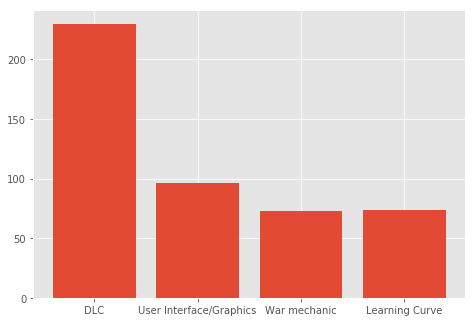

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['DLC', 'User Interface/Graphics', 'War mechanic', 'Learning Curve']
number = [230,96,73,74]
ax.bar(categories,number)
plt.show()

Granted there does exist some overlap in the reviews with regards to the criticisms of the game and no precise set of keywords can fully encapsulate the message of the reviews, it still provides some useful insight of what issue ranks the highest of concerns, the DLC policies

lets get back to assesing the hours played in these titles when it comes to reviews. 

Hearts of Iron IV and Stellaris are considered newer titles in the grand strategy genre. Besides their much recent release dates in comparison to Victoria 2 and Crusader Kings 2, they are marked by several features that set them apart. These include:

- Better graphics and user interfaces 
- Dedicated developers that are still releasing patches and updates
- Better optimization when it comes to game performance 
- Integrating AI to make the game less micro-management intensive 
- Better tutorials
- less of a steep of a learning curve

It is a thing in the community that has caused some tension between fans of the old classics like Victoria 2 and Crusader Kings 2 and the newer titles where they argue that the company is sacrficing depth for accessibility to attract new players in fear that a steep learning curve would deter newcomers. 

Nonetheless, let us find out if people on average feel more comfortable to leave a review after having played fewer hours when it comes to newer titles. In addition, let us also test the length of their reviews and see just how committed players are on average to expand on their reccomendations. It would be safe to assume that because the older titles have steeper learning curves, people on average should take more time to play the game in order to figure it out as well as report lenghty reviews to let newcomers know the intricacies behind such games. 

In [36]:
victoria2['PlayHours'].mean()

151.08401305057097

In [37]:
crusader_kings2['PlayHours'].mean()

159.8922895821071

In [38]:
hearts_of_iron4['PlayHours'].mean()

219.07116674117123

In [39]:
stellaris['PlayHours'].mean()

195.15057585667566

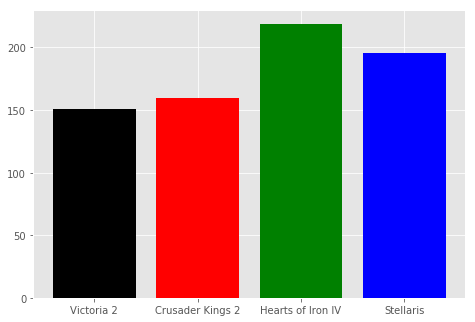

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Victoria 2', 'Crusader Kings 2', 'Hearts of Iron IV', 'Stellaris']
hours = [151.1,160,219.1,195.2]
ax.bar(titles,hours)
x_pos = np.arange(len(titles))
plt.bar(x_pos, hours, color=['black', 'red', 'green', 'blue'])
plt.show()


Interestingly enough, Hearts of Iron IV is arguably the easiest game to understand out of the sample yet more people on average take their time to play it before committing to a review. In addition, Stellaris, the second easiest game to learn, ranks second. While Victoria 2, which is arguably the most difficult of all of Paradox Game's to learn ranks the lowest. 

This completley goes against the previous assumption and could point that because people can master hearts of Iron IV much more quickly, they are confident to keep replaying it where as Victoria 2 players might be overwhelmed and stuck when it comes to gameplay so they pass a judgement call straight away. Let us examine their length of characters.

In [52]:
victoria2['ReviewLength'].mean()

105.14763458401305

In [53]:
crusader_kings2['ReviewLength'].mean()

115.95055915244261

In [54]:
hearts_of_iron4['ReviewLength'].mean()

93.53071077335717

In [55]:
stellaris['ReviewLength'].mean()

177.35518271008104

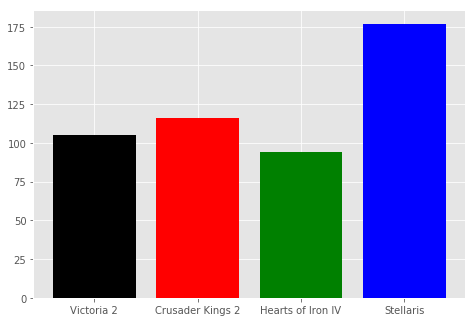

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Victoria 2', 'Crusader Kings 2', 'Hearts of Iron IV', 'Stellaris']
character_length = [105,116,94,177]
ax.bar(titles,character_length )
x_pos = np.arange(len(titles))
plt.bar(x_pos, character_length , color=['black', 'red', 'green', 'blue'])
plt.show()

Granted Hearts of Iron IV may have the most hours played prior to a review, it ranks the lowest when considering the length of such reviews. Stellaris ranks the highest while the older titles rank in the middle. Nonetheless, it is interesting to note that both newer titles took the lead in these two questions. 

With regards to this, stellaris might rank the highest because its the first game of its kind to deviate from historical narratives and focus sci-fi. Avid sci-fi fans enjoy long works of fiction and could be impressed by the game's mechanics revolving around space exploration that they feel the need to expand on their description to explain to newcomers who want to purchase the game.

Let us illustrate these two variables in a scatter plot to give us an overall idea of their relationship to one another

Text(0, 0.5, 'Hours Played')

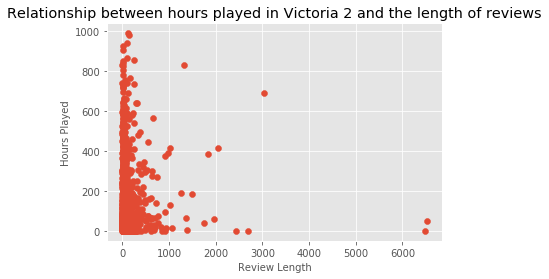

In [72]:
plt.scatter(victoria2['ReviewLength'],victoria2['PlayHours'])

plt.title("Relationship between hours played in Victoria 2 and the length of reviews")
plt.xlabel('Review Length',fontsize=10)
plt.ylabel('Hours Played',fontsize=10)


Text(0, 0.5, 'Hours Played')

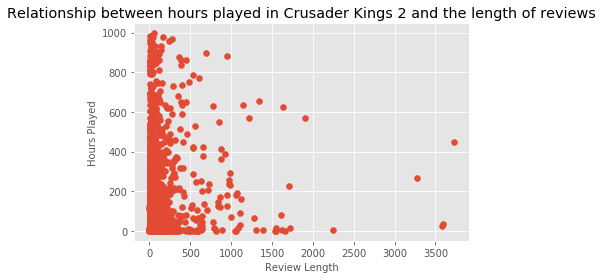

In [71]:
plt.scatter(crusader_kings2['ReviewLength'],crusader_kings2['PlayHours'])

plt.title("Relationship between hours played in Crusader Kings 2 and the length of reviews")
plt.xlabel('Review Length',fontsize=10)
plt.ylabel('Hours Played',fontsize=10)

Text(0, 0.5, 'Hours Played')

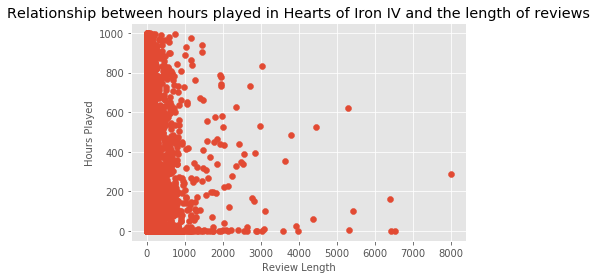

In [73]:
plt.scatter(hearts_of_iron4['ReviewLength'],hearts_of_iron4['PlayHours'])

plt.title("Relationship between hours played in Hearts of Iron IV and the length of reviews")
plt.xlabel('Review Length',fontsize=10)
plt.ylabel('Hours Played',fontsize=10)

Text(0, 0.5, 'Hours Played')

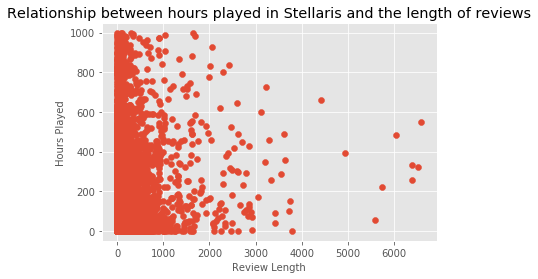

In [74]:
plt.scatter(stellaris['ReviewLength'],stellaris['PlayHours'])

plt.title("Relationship between hours played in Stellaris and the length of reviews")
plt.xlabel('Review Length',fontsize=10)
plt.ylabel('Hours Played',fontsize=10)

These plots highlight what we already discussed, as we can see in the hearts of iron IV plot, it heavily clusters at the top of the hours played while Stellaris has a heavy cluster in the middle of the review length 